# üìù Ejercicios: Visualizaci√≥n de Datos con Matplotlib y Seaborn

## Instrucciones
- Completa cada ejercicio en la celda correspondiente
- Intenta resolverlos sin mirar las soluciones
- Experimenta con diferentes par√°metros y personalizaciones

## üîß Configuraci√≥n Inicial

Ejecuta esta celda primero para cargar los datos y las librer√≠as necesarias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")



In [6]:
# Cargar datos (ajusta la ruta seg√∫n tu ubicaci√≥n)
df1 = pd.read_excel(r"C:\Users\amval\Documents\bootcamp_ug\data_bootcamp\EDA\data\DTM_Mixed Migration Flows to Europe_Yearly_2023_1.xlsx",
                   sheet_name="First_Arrival_Countries_CoO")
df2 = pd.read_excel(r"C:\Users\amval\Documents\bootcamp_ug\data_bootcamp\EDA\data\DTM_Mixed Migration Flows to Europe_Yearly_2024_1.xlsx",
                   sheet_name="First_Arrival_Countries_CoO")

# Procesar df1
df1.columns = df1.iloc[2]
df1 = df1.drop([0, 1, 2]).reset_index(drop=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1 = df1.rename(columns={'Monthly arrivals': 'Arrivals'})
df1 = df1[['Date', 'Year', 'Month', 'ISO3 - Country of origin', 'ISO3 - Country of arrival', 'Route', 'Arrivals', 'Source']]

# Unir dataframes
df_arrivals = pd.concat([df1, df2], ignore_index=True)
df_arrivals['Arrivals'] = pd.to_numeric(df_arrivals['Arrivals'], errors='coerce')
df_arrivals['Quarter'] = pd.cut(df_arrivals['Month'], bins=[0,3,6,9,12], labels=['Q1','Q2','Q3','Q4'])

print("Datos cargados correctamente")
print(f"Total de registros: {len(df_arrivals)}")

Datos cargados correctamente
Total de registros: 3988


## üìä Parte 1: Ejercicios B√°sicos de Visualizaci√≥n

### Ejercicio 1.1: Gr√°fico de Barras Verticales
**Objetivo:** Crear un gr√°fico de barras que muestre los 5 pa√≠ses de origen con menos llegadas.

**Pistas:**
- Usa `.tail(5)` en lugar de `.head(5)`
- Personaliza el color con el par√°metro `color='red'`

In [9]:
df_arrivals.columns

Index(['Date', 'Year', 'Month', 'ISO3 - Country of origin',
       'ISO3 - Country of arrival', 'Route', 'Arrivals', 'Source', 'Quarter'],
      dtype='object')

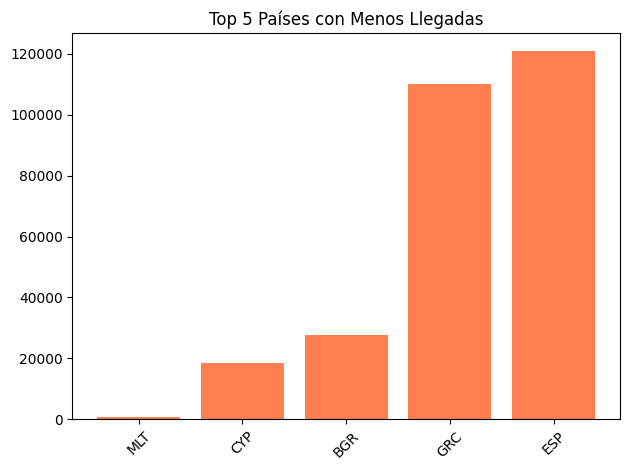

In [ ]:
# Tu c√≥digo aqu√≠
# Top 5 con menos llegadas
top5_menos = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nsmallest(5)

# Gr√°fico b√°sico
plt.bar(top5_menos.index, top5_menos.values, color='coral')
plt.title('Top 5 Pa√≠ses con Menos Llegadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ejercicio 1.2: Gr√°fico de Barras Horizontales con Etiquetas
**Objetivo:** Crea un gr√°fico horizontal de los 10 destinos principales y a√±ade etiquetas de valores en cada barra.

**Pistas:**
- Usa `kind='barh'`
- Aplica `ax.bar_label(ax.containers[0])`

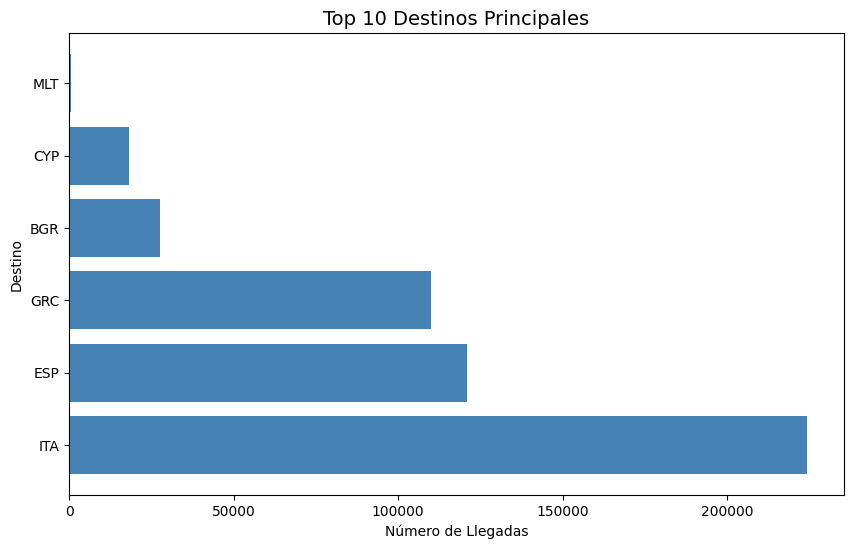

In [15]:
# Paso 1: Obtener los 10 destinos con m√°s llegadas
top10 = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(10)

# Paso 2: Crear el gr√°fico horizontal
plt.figure(figsize=(10, 6))
plt.barh(top10.index, top10.values, color='steelblue')

# Paso 3: A√±adir t√≠tulo y etiquetas
plt.title('Top 10 Destinos Principales', fontsize=14)
plt.xlabel('N√∫mero de Llegadas')
plt.ylabel('Destino')

# Paso 4: Mostrar
plt.show()

### Ejercicio 1.3: Pie Chart Personalizado
**Objetivo:** Muestra la distribuci√≥n de llegadas entre los 8 principales destinos con colores personalizados.

**Pistas:**
- Usa el par√°metro `colormap='Pastel1'`
- A√±ade `startangle=90` para rotar el gr√°fico
- Incluye `explode` para destacar una porci√≥n

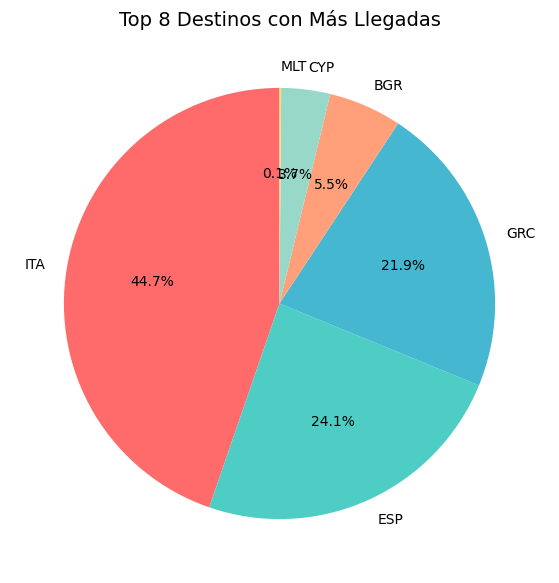

In [14]:
# Tu c√≥digo aqu√≠
# Paso 1: Encontrar los 8 destinos con m√°s llegadas
top8_destinos = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().sort_values(ascending=False).head(8)

# Paso 2: Elegir colores bonitos para cada porci√≥n
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', 
           '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']

# Paso 3: Crear el gr√°fico circular (pie chart)
plt.figure(figsize=(10, 7))

plt.pie(top8_destinos.values,           # Los valores (n√∫meros)
        labels=top8_destinos.index,      # Los nombres de los destinos
        autopct='%1.1f%%',               # Mostrar porcentajes
        colors=colores,                  # Aplicar nuestros colores
        startangle=90)                   # Empezar desde arriba

# Paso 4: A√±adir t√≠tulo
plt.title('Top 8 Destinos con M√°s Llegadas', fontsize=14)

# Paso 5: Mostrar el gr√°fico
plt.show()


## üìà Parte 2: Visualizaci√≥n Temporal

### Ejercicio 2.1: Gr√°fico de L√≠neas M√∫ltiples
**Objetivo:** Compara las llegadas mensuales de 2023 y 2024 en un solo gr√°fico de l√≠neas con marcadores diferentes.

**Pistas:**
- Usa `marker='o'` para 2023 y `marker='s'` para 2024
- A√±ade diferentes colores con `color='blue'` y `color='orange'`

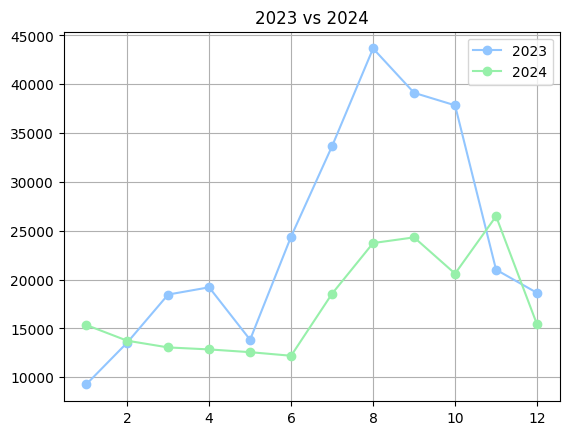

In [17]:
# Tu c√≥digo aqu√≠
# Datos mensuales por a√±o
datos = df_arrivals.groupby(['Year', 'Month'])['Arrivals'].sum().unstack(level=0)

# Gr√°fico b√°sico
plt.plot(datos[2023], marker='o', label='2023')
plt.plot(datos[2024], marker='o', label='2024')
plt.title('2023 vs 2024')
plt.legend()
plt.grid()
plt.show()

### Ejercicio 2.2: An√°lisis Trimestral
**Objetivo:** Crea un gr√°fico de barras agrupadas comparando Q1 vs Q2 vs Q3 vs Q4 para ambos a√±os.

**Pistas:**
- Usa `stacked=False` para barras agrupadas
- Aplica `rot=0` para etiquetas horizontales

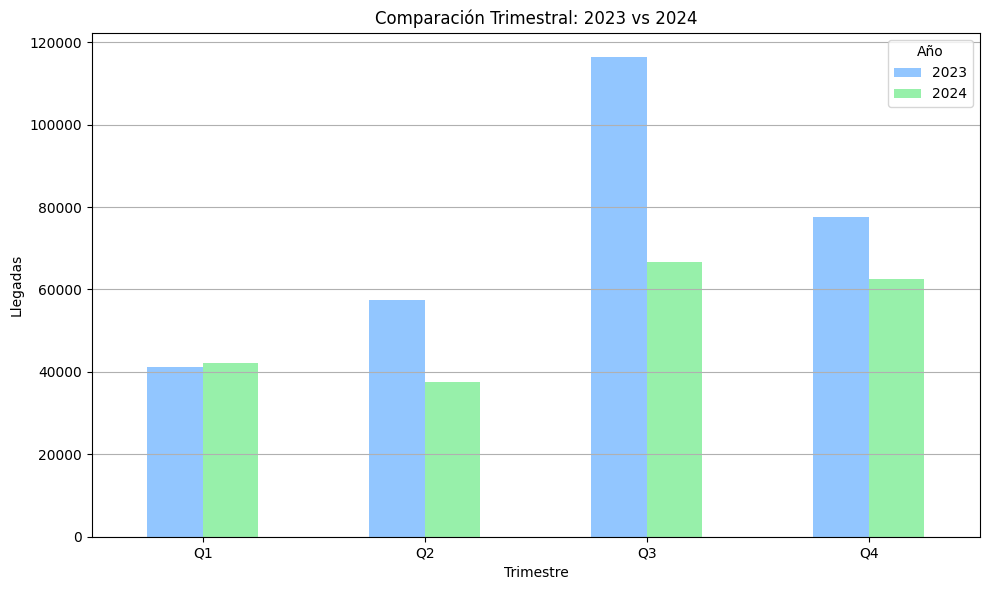

In [18]:
# Tu c√≥digo aqu√≠
# Crear columna de trimestre
df_arrivals['Trimestre'] = 'Q' + ((df_arrivals['Month'] - 1) // 3 + 1).astype(str)

# Datos por a√±o y trimestre
datos_trim = df_arrivals.groupby(['Year', 'Trimestre'])['Arrivals'].sum().unstack(level=0)

# Gr√°fico de barras agrupadas
datos_trim.plot(kind='bar', figsize=(10, 6))
plt.title('Comparaci√≥n Trimestral: 2023 vs 2024')
plt.xlabel('Trimestre')
plt.ylabel('Llegadas')
plt.legend(title='A√±o')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Ejercicio 2.3: Tendencia con √Årea
**Objetivo:** Crea un gr√°fico de √°rea (`kind='area'`) mostrando la evoluci√≥n mensual total de llegadas.

**Pistas:**
- Agrupa solo por 'Month' sumando todas las llegadas
- Usa `alpha=0.5` para transparencia

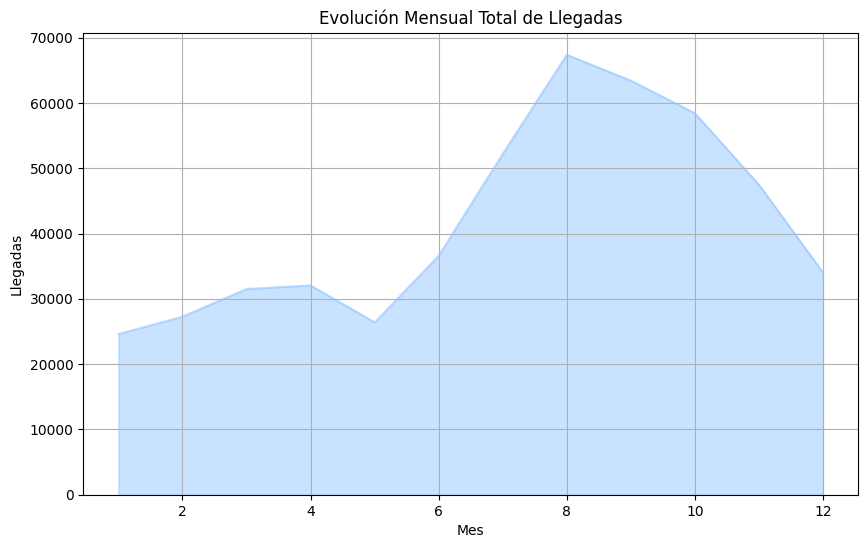

In [19]:
# Tu c√≥digo aqu√≠
# Agrupar llegadas totales por mes
llegadas_mes = df_arrivals.groupby('Month')['Arrivals'].sum()

# Gr√°fico de √°rea
llegadas_mes.plot(kind='area', alpha=0.5, figsize=(10, 6))
plt.title('Evoluci√≥n Mensual Total de Llegadas')
plt.xlabel('Mes')
plt.ylabel('Llegadas')
plt.grid(True)
plt.show()

## üî• Parte 3: Heatmaps y Visualizaci√≥n Multivariada

### Ejercicio 3.1: Heatmap Personalizado
**Objetivo:** Crea un heatmap de los 5 principales or√≠genes vs los 5 principales destinos.

**Pistas:**
- Usa `cmap='YlOrRd'` para un mapa de calor rojo-amarillo
- A√±ade `linewidths=0.5` para separar las celdas
- Usa `fmt='.0f'` para n√∫meros enteros en anotaciones

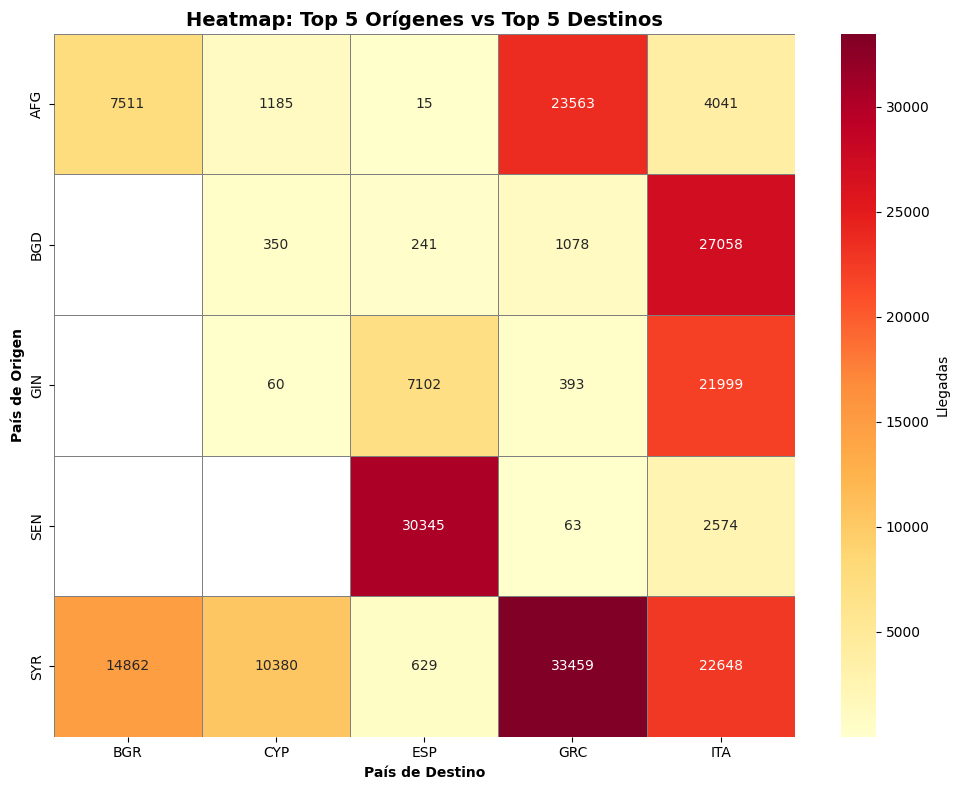

In [22]:
# Tu c√≥digo aqu√≠
import seaborn as sns

# Paso 1: Identificar top 5 or√≠genes y destinos
top5_origenes = df_arrivals.groupby('ISO3 - Country of origin')['Arrivals'].sum().nlargest(5).index
top5_destinos = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5).index

# Paso 2: Filtrar datos
df_filtrado = df_arrivals[
    (df_arrivals['ISO3 - Country of origin'].isin(top5_origenes)) & 
    (df_arrivals['ISO3 - Country of arrival'].isin(top5_destinos))
]

# Paso 3: Crear tabla pivote
heatmap_data = df_filtrado.pivot_table(
    values='Arrivals',
    index='ISO3 - Country of origin',
    columns='ISO3 - Country of arrival',
    aggfunc='sum'
)

# Paso 4: Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, 
            annot=True,           # Mostrar n√∫meros
            fmt='.0f',            # Sin decimales
            cmap='YlOrRd',        # Colores amarillo-rojo
            linewidths=0.5,       # L√≠neas entre celdas
            linecolor='gray',     # Color de las l√≠neas
            cbar_kws={'label': 'Llegadas'})  # Etiqueta de la barra de color

plt.title('Heatmap: Top 5 Or√≠genes vs Top 5 Destinos', fontsize=14, fontweight='bold')
plt.xlabel('Pa√≠s de Destino', fontweight='bold')
plt.ylabel('Pa√≠s de Origen', fontweight='bold')
plt.tight_layout()
plt.show()

### Ejercicio 3.2: Matriz de Correlaci√≥n (Avanzado)
**Objetivo:** Crea una matriz que muestre la correlaci√≥n entre meses (¬øqu√© meses tienen patrones similares de llegadas?).

**Pistas:**
- Crea una tabla pivote: filas=Month, columnas=Country of arrival, valores=Arrivals
- Usa `.corr()` para calcular correlaciones
- Aplica `sns.heatmap()`

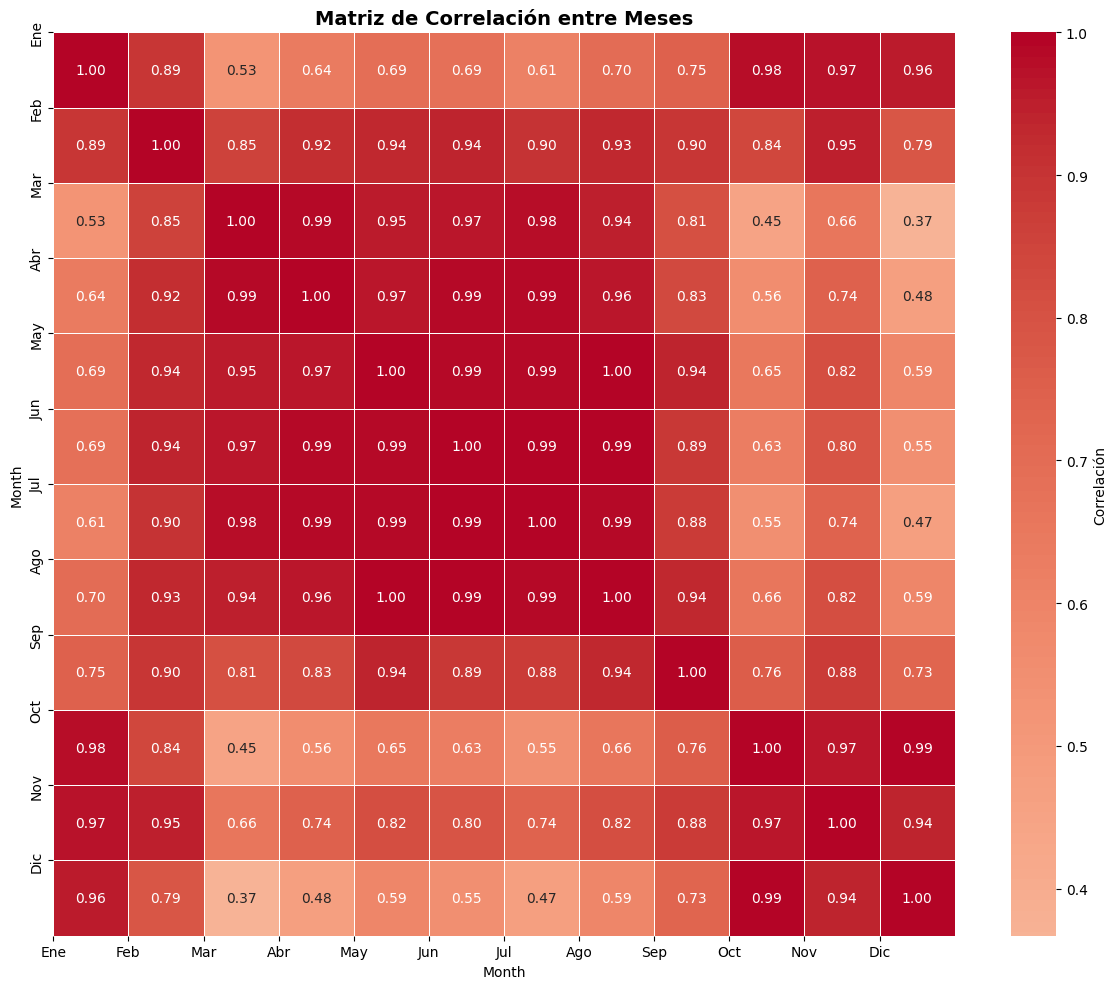

In [23]:
# Tu c√≥digo aqu√≠
import seaborn as sns

# Paso 1: Crear tabla pivote (mes vs pa√≠s)
pivot_meses = df_arrivals.pivot_table(
    values='Arrivals',
    index='Month',
    columns='ISO3 - Country of arrival',
    aggfunc='sum'
)

# Paso 2: Calcular correlaci√≥n entre meses
correlacion = pivot_meses.T.corr()

# Paso 3: Crear heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlaci√≥n'})

# Nombres de meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(range(12), meses)
plt.yticks(range(12), meses)

plt.title('Matriz de Correlaci√≥n entre Meses', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## üéØ Parte 4: Ejercicios de An√°lisis Espec√≠fico

### Ejercicio 4.1: Comparaci√≥n de Rutas
**Objetivo:** Identifica y visualiza las 3 rutas m√°s utilizadas hacia Espa√±a.

**Pistas:**
- Filtra por `'ISO3 - Country of arrival'=='ESP'`
- Agrupa por origen
- Usa un gr√°fico de barras con colores degradados

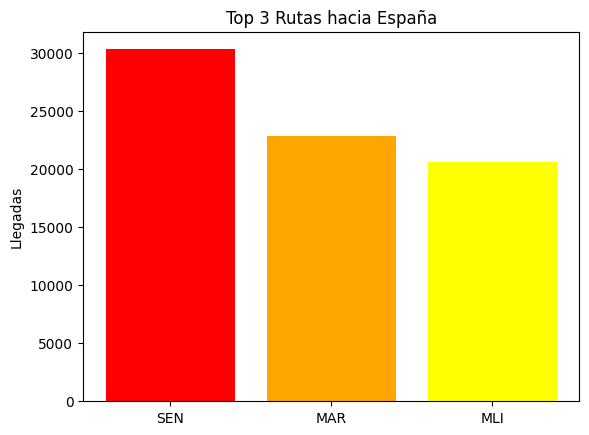

In [24]:
# Tu c√≥digo aqu√≠
# Filtrar llegadas a Espa√±a y obtener top 3 or√≠genes
llegadas_esp = df_arrivals[df_arrivals['ISO3 - Country of arrival'] == 'ESP']
top3 = llegadas_esp.groupby('ISO3 - Country of origin')['Arrivals'].sum().nlargest(3)

# Gr√°fico
plt.bar(top3.index, top3.values, color=['red', 'orange', 'yellow'])
plt.title('Top 3 Rutas hacia Espa√±a')
plt.ylabel('Llegadas')
plt.show()


### Ejercicio 4.2: An√°lisis de Estacionalidad
**Objetivo:** Crea un gr√°fico que muestre si hay estacionalidad (¬øciertos meses tienen m√°s llegadas?).

**Pistas:**
- Agrupa por Month sin Year
- Calcula la media de llegadas por mes
- Usa un gr√°fico de l√≠neas con √°rea sombreada

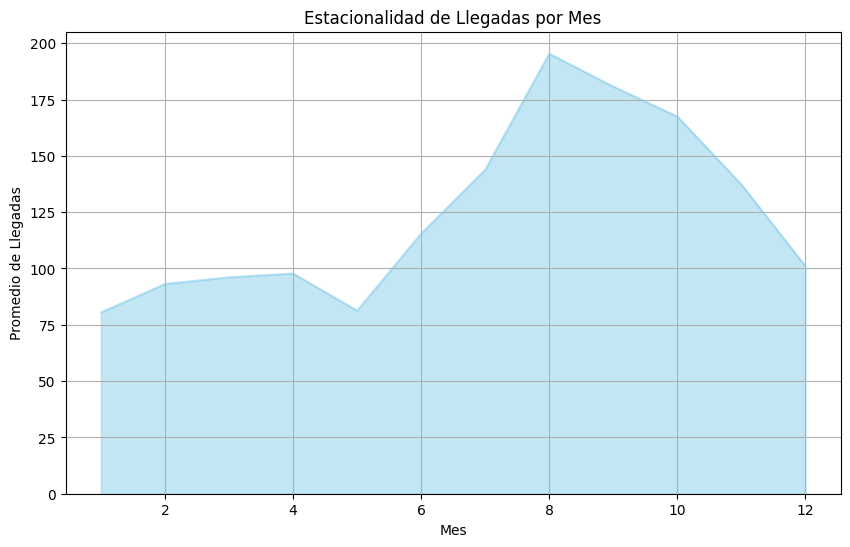

In [25]:
# Tu c√≥digo aqu√≠
# Promedio de llegadas por mes
promedio_mes = df_arrivals.groupby('Month')['Arrivals'].mean()

# Gr√°fico de √°rea
promedio_mes.plot(kind='area', alpha=0.5, color='skyblue', figsize=(10, 6))
plt.title('Estacionalidad de Llegadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Llegadas')
plt.grid(True)
plt.show()

### Ejercicio 4.3: Top Destinos por Trimestre
**Objetivo:** Crea 4 subgr√°ficos (uno por trimestre) mostrando los top 5 destinos en cada uno.

**Pistas:**
- Usa `plt.subplots(2, 2, figsize=(12,10))`
- Filtra por Quarter
- Crea un bucle for para cada trimestre

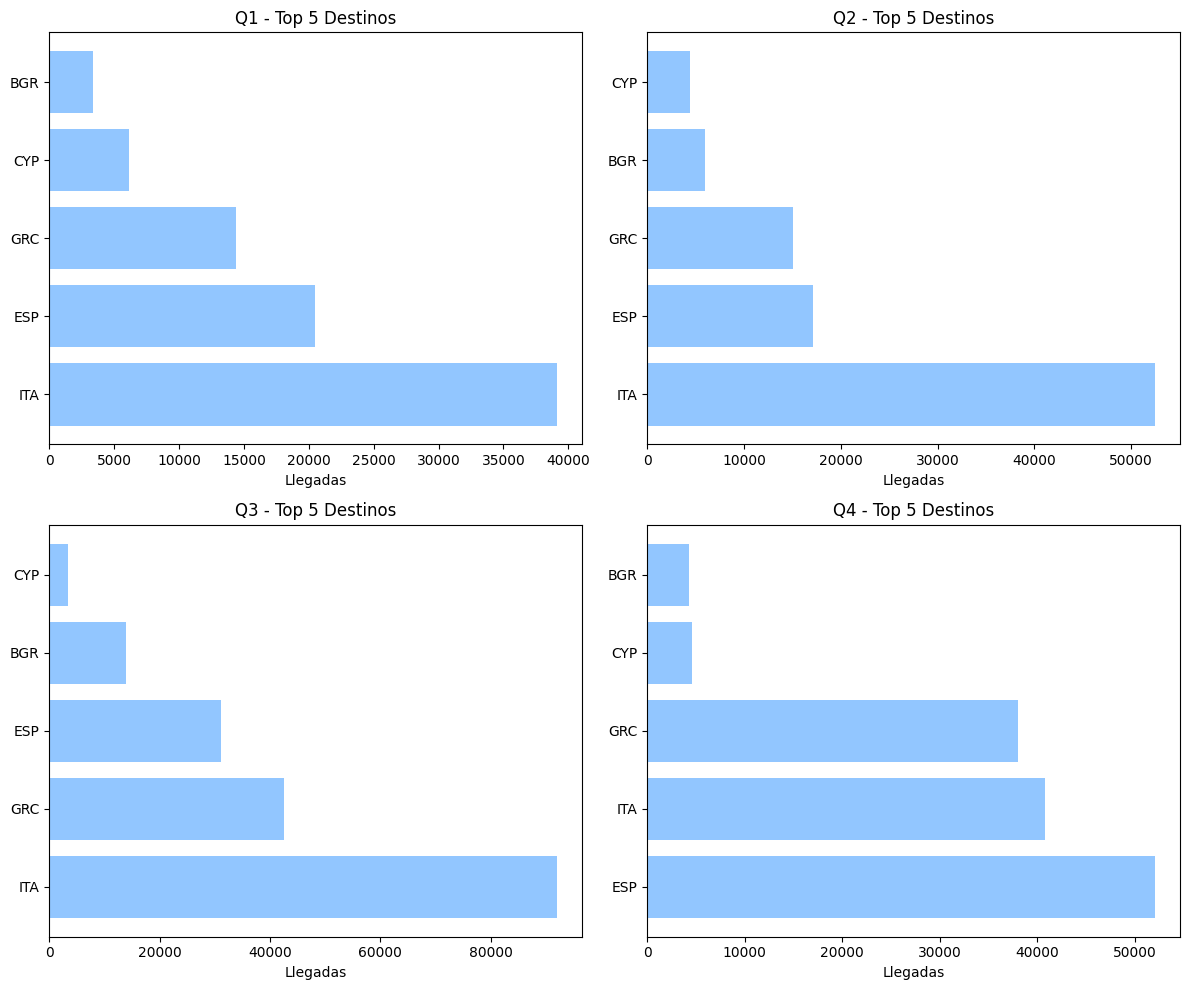

In [26]:
# Tu c√≥digo aqu√≠
# Crear trimestre
df_arrivals['Trimestre'] = 'Q' + ((df_arrivals['Month'] - 1) // 3 + 1).astype(str)

# Crear 4 subgr√°ficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Top 5 destinos para cada trimestre
for i, trimestre in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    datos = df_arrivals[df_arrivals['Trimestre'] == trimestre]
    top5 = datos.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5)
    
    axes[i].barh(top5.index, top5.values)
    axes[i].set_title(f'{trimestre} - Top 5 Destinos')
    axes[i].set_xlabel('Llegadas')

plt.tight_layout()
plt.show()

## üöÄ Parte 5: Proyecto Integrador

### Ejercicio 5.1: Dashboard Completo
**Objetivo:** Crea un dashboard con 6 visualizaciones en una sola figura.

**Requisitos:**
1. Top 5 destinos (barras)
2. Top 5 or√≠genes (barras horizontales)
3. Evoluci√≥n mensual 2023 vs 2024 (l√≠neas)
4. Distribuci√≥n por trimestre (pie)
5. Heatmap origen-destino (top 5x5)
6. Llegadas a Espa√±a por mes (√°rea)

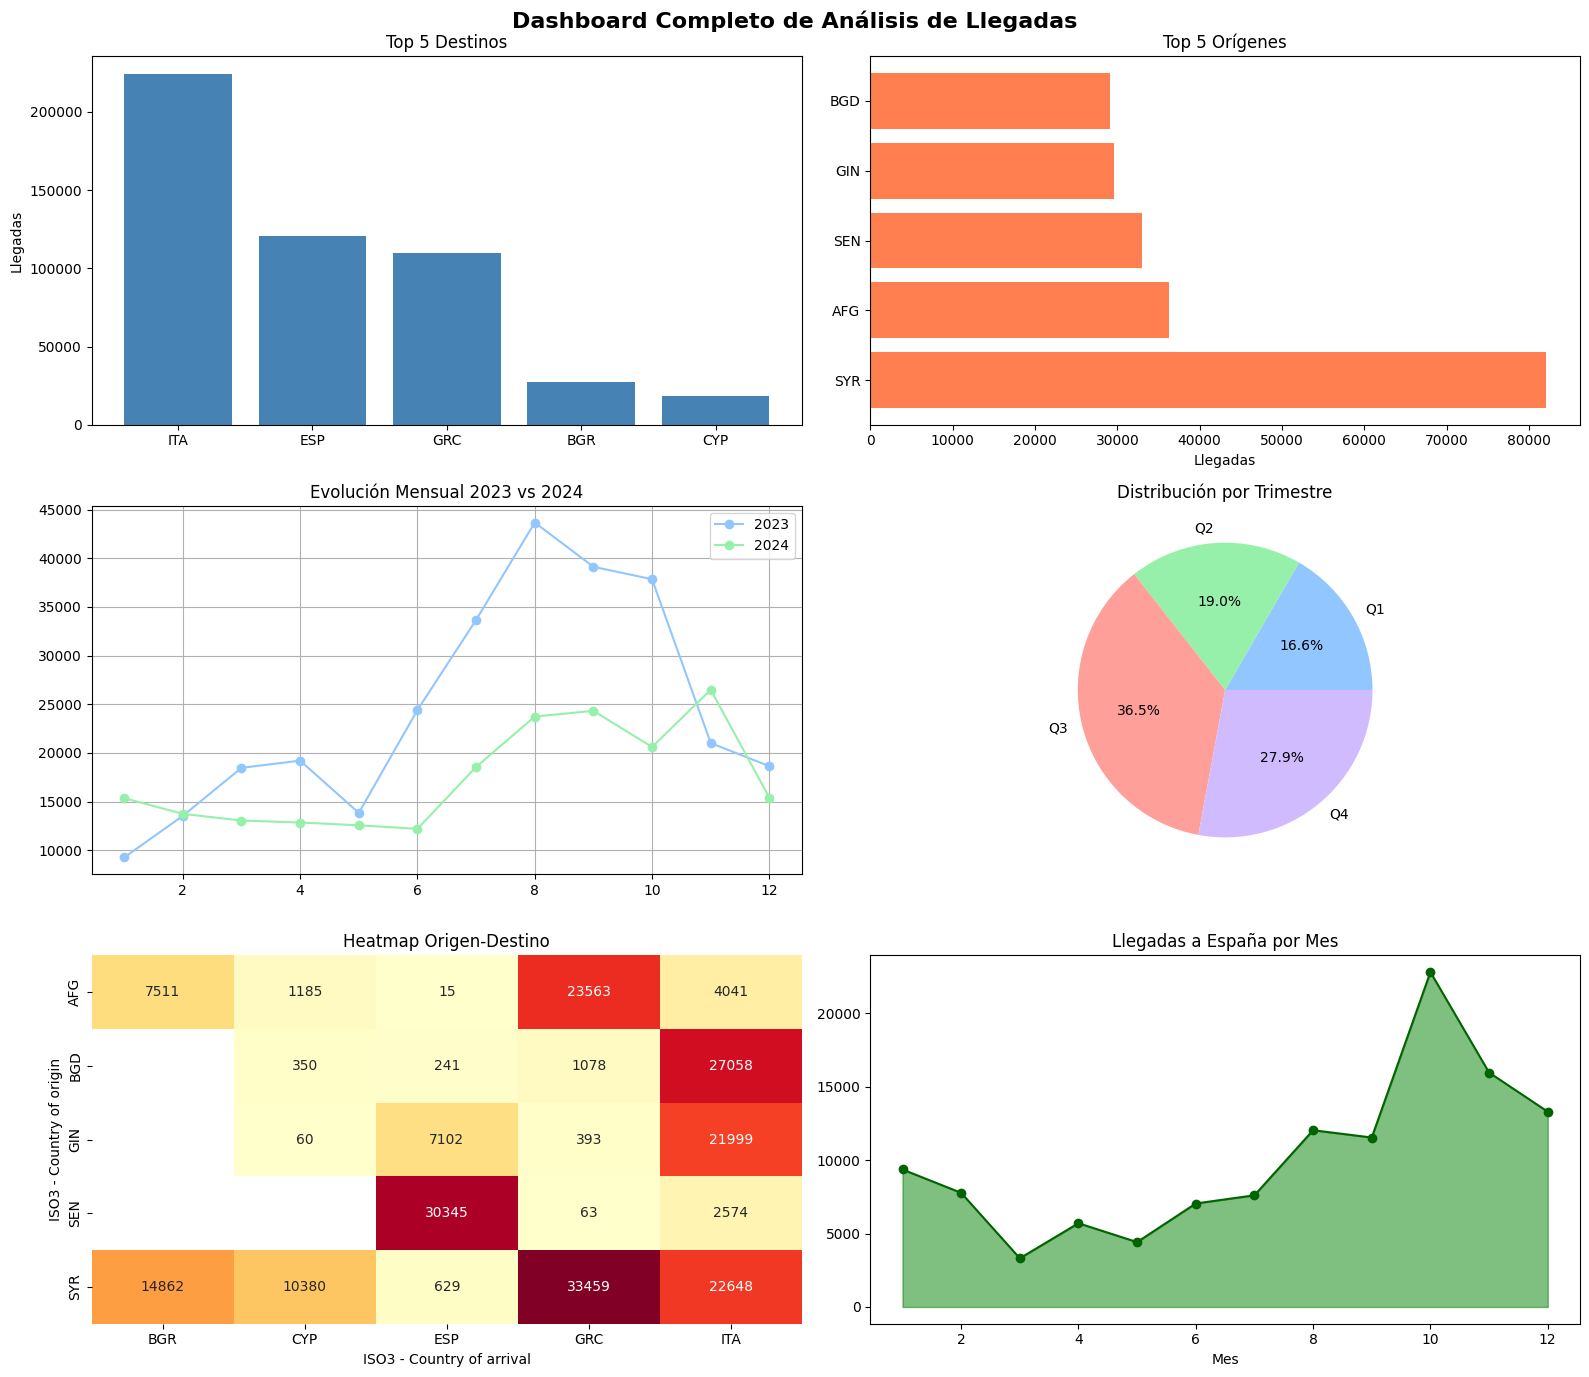

In [28]:
# Tu c√≥digo aqu√≠
# Pista: fig, axes = plt.subplots(3, 2, figsize=(15, 12))

import seaborn as sns

# Preparar datos
df_arrivals['Trimestre'] = 'Q' + ((df_arrivals['Month'] - 1) // 3 + 1).astype(str)

# Crear figura con 6 subgr√°ficos
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# 1. Top 5 destinos
top5_dest = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5)
axes[0, 0].bar(top5_dest.index, top5_dest.values, color='steelblue')
axes[0, 0].set_title('Top 5 Destinos')
axes[0, 0].set_ylabel('Llegadas')

# 2. Top 5 or√≠genes
top5_orig = df_arrivals.groupby('ISO3 - Country of origin')['Arrivals'].sum().nlargest(5)
axes[0, 1].barh(top5_orig.index, top5_orig.values, color='coral')
axes[0, 1].set_title('Top 5 Or√≠genes')
axes[0, 1].set_xlabel('Llegadas')

# 3. Evoluci√≥n mensual 2023 vs 2024
datos_mes = df_arrivals.groupby(['Year', 'Month'])['Arrivals'].sum().unstack(level=0)
axes[1, 0].plot(datos_mes.index, datos_mes[2023], marker='o', label='2023')
axes[1, 0].plot(datos_mes.index, datos_mes[2024], marker='o', label='2024')
axes[1, 0].set_title('Evoluci√≥n Mensual 2023 vs 2024')
axes[1, 0].legend()
axes[1, 0].grid(True)

# 4. Distribuci√≥n por trimestre
trim_dist = df_arrivals.groupby('Trimestre')['Arrivals'].sum()
axes[1, 1].pie(trim_dist.values, labels=trim_dist.index, autopct='%1.1f%%')
axes[1, 1].set_title('Distribuci√≥n por Trimestre')

# 5. Heatmap origen-destino
top5_o = df_arrivals.groupby('ISO3 - Country of origin')['Arrivals'].sum().nlargest(5).index
top5_d = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5).index
df_filt = df_arrivals[(df_arrivals['ISO3 - Country of origin'].isin(top5_o)) & 
                      (df_arrivals['ISO3 - Country of arrival'].isin(top5_d))]
hm = df_filt.pivot_table(values='Arrivals', index='ISO3 - Country of origin', 
                         columns='ISO3 - Country of arrival', aggfunc='sum')
sns.heatmap(hm, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[2, 0], cbar=False)
axes[2, 0].set_title('Heatmap Origen-Destino')

# 6. Llegadas a Espa√±a por mes
esp_mes = df_arrivals[df_arrivals['ISO3 - Country of arrival'] == 'ESP'].groupby('Month')['Arrivals'].sum()
axes[2, 1].fill_between(esp_mes.index, esp_mes.values, alpha=0.5, color='green')
axes[2, 1].plot(esp_mes.index, esp_mes.values, color='darkgreen', marker='o')
axes[2, 1].set_title('Llegadas a Espa√±a por Mes')
axes[2, 1].set_xlabel('Mes')

plt.suptitle('Dashboard Completo de An√°lisis de Llegadas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# üìä Explicaci√≥n del Dashboard Completo

## üéØ ¬øQu√© es un Dashboard?

Un **dashboard** es como un panel de control que te muestra m√∫ltiples visualizaciones en una sola pantalla. Es perfecto para tener una visi√≥n completa de tus datos de un vistazo.

---

## üèóÔ∏è Estructura del C√≥digo

### üì¶ **Paso 1: Preparar los Datos**

```python
df_arrivals['Trimestre'] = 'Q' + ((df_arrivals['Month'] - 1) // 3 + 1).astype(str)
```

**¬øQu√© hace?**
- ‚úÖ Crea una nueva columna llamada `Trimestre`
- ‚úÖ Convierte cada mes en su trimestre correspondiente:
  - Enero, Febrero, Marzo ‚Üí **Q1**
  - Abril, Mayo, Junio ‚Üí **Q2**
  - Julio, Agosto, Septiembre ‚Üí **Q3**
  - Octubre, Noviembre, Diciembre ‚Üí **Q4**

---

### üñºÔ∏è **Paso 2: Crear la Estructura de Subgr√°ficos**

```python
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
```

**¬øQu√© significa?**
- üìê `3, 2` = 3 filas y 2 columnas = **6 espacios** para gr√°ficos
- üìè `figsize=(16, 14)` = Tama√±o de la figura completa

**Visualizaci√≥n de la estructura:**
```
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ  Gr√°fico 1  ‚îÇ  Gr√°fico 2  ‚îÇ  ‚Üê Fila 1
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ  Gr√°fico 3  ‚îÇ  Gr√°fico 4  ‚îÇ  ‚Üê Fila 2
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ  Gr√°fico 5  ‚îÇ  Gr√°fico 6  ‚îÇ  ‚Üê Fila 3
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
```

---

## üìà Los 6 Gr√°ficos Explicados

### 1Ô∏è‚É£ **Top 5 Destinos (Barras Verticales)** üìç

```python
top5_dest = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5)
axes[0, 0].bar(top5_dest.index, top5_dest.values, color='steelblue')
```

**¬øQu√© muestra?**
- üèÜ Los 5 pa√≠ses que **reciben m√°s llegadas**
- üìä Barras verticales (hacia arriba)
- üé® Color azul acero (`steelblue`)

**Posici√≥n:** Fila 0, Columna 0 (arriba izquierda)

---

### 2Ô∏è‚É£ **Top 5 Or√≠genes (Barras Horizontales)** üõ´

```python
top5_orig = df_arrivals.groupby('ISO3 - Country of departure')['Arrivals'].sum().nlargest(5)
axes[0, 1].barh(top5_orig.index, top5_orig.values, color='coral')
```

**¬øQu√© muestra?**
- üåç Los 5 pa√≠ses que **m√°s viajeros env√≠an**
- ‚ÜîÔ∏è Barras horizontales (hacia la derecha)
- üé® Color coral (naranja-rojizo)

**Posici√≥n:** Fila 0, Columna 1 (arriba derecha)

**üí° Diferencia clave:**
- `axes[0, 0].bar()` ‚Üí Barras **verticales** ‚¨ÜÔ∏è
- `axes[0, 1].barh()` ‚Üí Barras **horizontales** ‚û°Ô∏è

---

### 3Ô∏è‚É£ **Evoluci√≥n Mensual 2023 vs 2024 (L√≠neas)** üìà

```python
datos_mes = df_arrivals.groupby(['Year', 'Month'])['Arrivals'].sum().unstack(level=0)
axes[1, 0].plot(datos_mes.index, datos_mes[2023], marker='o', label='2023')
axes[1, 0].plot(datos_mes.index, datos_mes[2024], marker='o', label='2024')
```

**¬øQu√© muestra?**
- üìÖ C√≥mo cambian las llegadas **mes a mes**
- üîµ L√≠nea para 2023
- üî¥ L√≠nea para 2024
- üîç Permite **comparar** ambos a√±os

**Posici√≥n:** Fila 1, Columna 0 (medio izquierda)

**Conceptos clave:**
- `.unstack(level=0)` ‚Üí Separa los a√±os en columnas diferentes
- `marker='o'` ‚Üí A√±ade c√≠rculos en cada punto

---

### 4Ô∏è‚É£ **Distribuci√≥n por Trimestre (Pie Chart)** ü•ß

```python
trim_dist = df_arrivals.groupby('Trimestre')['Arrivals'].sum()
axes[1, 1].pie(trim_dist.values, labels=trim_dist.index, autopct='%1.1f%%')
```

**¬øQu√© muestra?**
- üìä Qu√© porcentaje de llegadas tiene **cada trimestre**
- üç∞ Gr√°fico circular (pie chart)
- üìå Etiquetas: Q1, Q2, Q3, Q4
- üî¢ Porcentajes autom√°ticos con `autopct`

**Posici√≥n:** Fila 1, Columna 1 (medio derecha)

---

### 5Ô∏è‚É£ **Heatmap Origen-Destino (Top 5x5)** üî•

```python
top5_o = df_arrivals.groupby('ISO3 - Country of departure')['Arrivals'].sum().nlargest(5).index
top5_d = df_arrivals.groupby('ISO3 - Country of arrival')['Arrivals'].sum().nlargest(5).index
df_filt = df_arrivals[(df_arrivals['ISO3 - Country of departure'].isin(top5_o)) & 
                      (df_arrivals['ISO3 - Country of arrival'].isin(top5_d))]
hm = df_filt.pivot_table(values='Arrivals', index='ISO3 - Country of departure', 
                         columns='ISO3 - Country of arrival', aggfunc='sum')
sns.heatmap(hm, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[2, 0], cbar=False)
```

**¬øQu√© muestra?**
- üó∫Ô∏è Matriz de **rutas m√°s populares**
- üî• Colores: Amarillo (bajo) ‚Üí Rojo (alto)
- üìä Filas = Pa√≠ses de origen
- üìä Columnas = Pa√≠ses de destino
- üî¢ N√∫meros en cada celda

**Posici√≥n:** Fila 2, Columna 0 (abajo izquierda)

**Pasos del heatmap:**
1. Obtener top 5 or√≠genes (`top5_o`)
2. Obtener top 5 destinos (`top5_d`)
3. Filtrar datos para esos pa√≠ses (`df_filt`)
4. Crear tabla pivote (`pivot_table`)
5. Visualizar con `sns.heatmap()`

---

### 6Ô∏è‚É£ **Llegadas a Espa√±a por Mes (√Årea)** üá™üá∏

```python
esp_mes = df_arrivals[df_arrivals['ISO3 - Country of arrival'] == 'ESP'].groupby('Month')['Arrivals'].sum()
axes[2, 1].fill_between(esp_mes.index, esp_mes.values, alpha=0.5, color='green')
axes[2, 1].plot(esp_mes.index, esp_mes.values, color='darkgreen', marker='o')
```

**¬øQu√© muestra?**
- üá™üá∏ Llegadas espec√≠ficamente a **Espa√±a**
- üìà Gr√°fico de √°rea (relleno bajo la l√≠nea)
- üü¢ Color verde con transparencia
- üìç Marcadores en cada mes

**Posici√≥n:** Fila 2, Columna 1 (abajo derecha)

**T√©cnica:**
- `fill_between()` ‚Üí Crea el √°rea sombreada
- `plot()` ‚Üí A√±ade la l√≠nea encima
- `alpha=0.5` ‚Üí 50% de transparencia

---

## üé® Toques Finales

### **T√≠tulo General**
```python
plt.suptitle('Dashboard Completo de An√°lisis de Llegadas', fontsize=16, fontweight='bold')
```
- üìù `suptitle` = T√≠tulo superior para toda la figura
- üî† `fontsize=16` = Tama√±o de letra grande
- üí™ `fontweight='bold'` = Negrita

### **Ajustar Espaciado**
```python
plt.tight_layout()
```
- ‚ú® Ajusta autom√°ticamente los m√°rgenes
- üéØ Evita que los gr√°ficos se superpongan
- üìê Optimiza el uso del espacio

---

## üó∫Ô∏è Mapa de Posiciones en el Dashboard

```
axes[0, 0] ‚Üí Top 5 Destinos (barras)
axes[0, 1] ‚Üí Top 5 Or√≠genes (barras horizontales)
axes[1, 0] ‚Üí Evoluci√≥n 2023 vs 2024 (l√≠neas)
axes[1, 1] ‚Üí Distribuci√≥n Trimestral (pie)
axes[2, 0] ‚Üí Heatmap Origen-Destino (mapa de calor)
axes[2, 1] ‚Üí Llegadas a Espa√±a (√°rea)
```

---

## üìö Conceptos Clave Aprendidos

### üîπ **Subplots (Subgr√°ficos)**
```python
fig, axes = plt.subplots(filas, columnas, figsize=(ancho, alto))
```
Crea m√∫ltiples gr√°ficos en una sola figura.

### üîπ **Indexaci√≥n de Axes**
```python
axes[fila, columna]  # Para acceder a cada subgr√°fico
axes[0, 0]  # Primer gr√°fico (arriba izquierda)
axes[2, 1]  # √öltimo gr√°fico (abajo derecha)
```

### üîπ **Tipos de Gr√°ficos Usados**
- üìä `bar()` ‚Üí Barras verticales
- ‚ÜîÔ∏è `barh()` ‚Üí Barras horizontales
- üìà `plot()` ‚Üí L√≠neas
- ü•ß `pie()` ‚Üí Circular
- üî• `sns.heatmap()` ‚Üí Mapa de calor
- üèîÔ∏è `fill_between()` ‚Üí √Årea

---

## üöÄ Siguiente Nivel

Para mejorar tu dashboard podr√≠as:
- üé® Usar colores consistentes entre gr√°ficos
- üìä A√±adir m√°s m√©tricas (promedios, totales)
- üîÑ Hacerlo interactivo con bibliotecas como Plotly
- üíæ Guardarlo como imagen con `plt.savefig('dashboard.png')`
- üì± Adaptarlo a diferentes tama√±os de pantalla

---

## üí° Ejercicios Bonus (Desaf√≠o)

### Bonus 1: Crecimiento Interanual
Calcula y visualiza el crecimiento porcentual mes a mes entre 2023 y 2024 usando un gr√°fico de barras con colores condicionales (verde para crecimiento, rojo para decrecimiento).

In [ ]:
# Tu c√≥digo aqu√≠


### Bonus 2: An√°lisis de Rutas Espec√≠ficas
Identifica la ruta (origen-destino) con mayor variaci√≥n entre 2023 y 2024 y crea una visualizaci√≥n que muestre esta tendencia.

In [ ]:
# Tu c√≥digo aqu√≠


### Bonus 3: Visualizaci√≥n Estilo Infograf√≠a
Combina texto, n√∫meros y gr√°ficos para crear una infograf√≠a que resuma:
- Total de llegadas
- Top 3 destinos
- Mes con m√°s llegadas
- Crecimiento vs a√±o anterior

In [ ]:
# Tu c√≥digo aqu√≠
# Pista: Usa plt.text() para a√±adir texto a la figura
